In [1]:
import napari



In [5]:
napari.__version__

'0.4.17'

In [4]:
from napari.settings import get_settings
#get_settings().application.ipy_interactive = False  # disable interactive usage of Napari viewer (necessary for tpr.get_coordinates)


TypeError: issubclass() arg 1 must be a class

In [3]:
import npe2


TypeError: issubclass() arg 1 must be a class

<IPython.core.display.Javascript object>


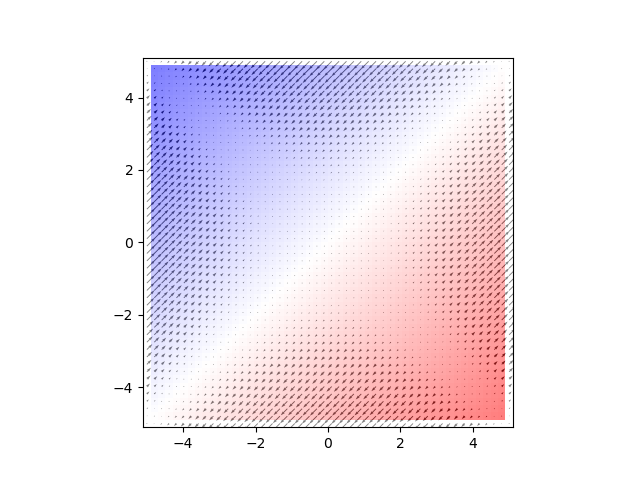

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib notebook

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y)
vx = X**2 - Y**2
vy = X**2 - Y**2

dX = (X.max() - X.min()) / (X.shape[1] - 1)

# compute div
div = np.empty(X.shape)
div[:] = np.nan
curl = np.empty(X.shape)
curl[:] = np.nan
for j in range(1, X.shape[0] - 1):
    for i in range(1, X.shape[1] - 1):
        # div
        Dx_vx = (vx[j, i + 1] - vx[j, i - 1]) / (2 * dX)
        Dy_vy = (vy[j + 1, i] - vy[j - 1, i]) / (2 * dX)
        div[j, i] = Dx_vx + Dy_vy
        # curl
        Dy_vx = (vx[j + 1, i] - vx[j - 1, i]) / (2 * dX)
        Dx_vy = (vy[j, i + 1] - vy[j, i - 1]) / (2 * dX)
        curl[j, i] = Dx_vy - Dy_vx

plt.quiver(X,Y,vx,vy)
ax = plt.gca()
ax.set_aspect('equal')

cmap = copy.copy(plt.get_cmap('bwr'))
val = div
val_masked = np.ma.array(val, mask=np.isnan(val))
[vmin, vmax] = [val_masked.min(), val_masked.max()]
cmap.set_bad('w', alpha=0)  # set NAN transparent

# shading=nearest so color value is centered on grid points
# for more info on pcolormesh behavior, see https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolormesh_grids.html#sphx-glr-gallery-images-contours-and-fields-pcolormesh-grids-py
plt.pcolormesh(X, Y, val_masked, cmap=cmap, alpha=0.5, vmin=vmin, vmax=vmax, shading='nearest')

In [18]:
Dy_vx

0.0

In [ ]:
plt.plot(X[24,:],div[24,:])
plt.plot(X[24,:],-3*X[24,:]**2)
Y[24,:]

In [ ]:
example_data=[data_dir,
              data,
              image,
              filters,
              traj_module_wid,
              MSD_fit,
              plot_param_vs_param_,
              plot_track_param_vs_param_,
              plot_param_hist_,
              plot_t_param_hist_,
              plot_centered_traj_,
              traj_parameters,
              MSD_parameters,
              plot_param]
pickle.dump(example_data, open('example_data.p', "wb"))

In [ ]:
ant_dir=osp.join(data_dir,'pooled_datasets','pool_p1_ant_p2_ant_p3_ant')
pos_dir=osp.join(data_dir,'pooled_datasets','pool_p1_pos_p2_pos_p3_pos')

df_ant=pd.read_csv(osp.join(ant_dir,'pooled_all_data.csv'))
df_ant['dataset']='ant'
df_pos=pd.read_csv(osp.join(pos_dir,'pooled_all_data.csv'))
df_pos['dataset']='pos'

track_df_ant=pd.read_csv(osp.join(ant_dir,'pooled_track_data.csv'))
track_df_ant['dataset']='ant'
track_df_pos=pd.read_csv(osp.join(pos_dir,'pooled_track_data.csv'))
track_df_pos['dataset']='pos'

MSD_df_ant=pd.read_csv(osp.join(ant_dir,'pooled_MSD_data.csv'))
MSD_df_ant['dataset']='ant'
MSD_df_pos=pd.read_csv(osp.join(pos_dir,'pooled_MSD_data.csv'))
MSD_df_pos['dataset']='pos'

#MSD_plot_param={'logplot_x':'x-axis' in logplot_wid.value,
#                    'logplot_y':'y-axis' in logplot_wid.value,
#                    'alpha':0.01}

df_=compare_datasets(data_dir,df_list=[df_ant,df_pos],track_df_list=[track_df_ant,track_df_pos],MSD_df_list=[MSD_df_ant,MSD_df_pos],datasets_names=['ant','pos'],plotting_mode='compare',
                 param_couples=param_couples,
                 param_hist=param_hist,
                 param_boxplot=param_box,
                 param_track_couples=track_param_couples,
                 param_track_hist=track_param_hist,
                 param_track_boxplot=track_param_box,
                 MSD_plot_param=MSD_plot_param,
                 plot_param=plot_param)

In [ ]:
root_dir_='/Users/amichaut/SynologyDrive/temp/FN_coating/'
dir_cont=osp.join(root_dir_,'20190911','p1_cells','pooled_datasets','compare_ant_pos')
dir_PD03=osp.join(root_dir_,'20190917','p1','pooled_datasets','compare_ant_pos')
#dir_cont=osp.join(root_dir_,'20190529','p1','pooled_datasets','compare_ant_pos')
#dir_PD03=osp.join(root_dir_,'20190612','p1','pooled_datasets','compare_ant_pos')

df_cont=pd.read_csv(osp.join(dir_cont,'pooled_all_data.csv'),index_col=0)
df_cont['condition']='control'
df_cont.rename(columns={'dataset':'region'},inplace=True)
df_PD03=pd.read_csv(osp.join(dir_PD03,'pooled_all_data.csv'),index_col=0)
df_PD03['condition']='PD03'
df_PD03.rename(columns={'dataset':'region'},inplace=True)

df_all=pd.concat([df_cont,df_PD03])
df_all.to_csv(osp.join(root_dir_,'all_data.csv'))

fig,ax=plt.subplots()
sns.violinplot(x="region", y="v",hue="condition",data=df_all,split=True,inner="quartile",ax=ax)
ax.set_ylabel(r'v ($\mu m/min$)')
ax.legend(frameon=False)
fig.tight_layout()
fig.savefig(osp.join(root_dir_,'v.png'),dpi=300)

## MSD
MSD_cont_ant=pd.read_csv(osp.join(dir_cont,'all_MSD_mean_ant.csv'),index_col=0)
MSD_cont_pos=pd.read_csv(osp.join(dir_cont,'all_MSD_mean_pos.csv'),index_col=0)
MSD_PD03_ant=pd.read_csv(osp.join(dir_PD03,'all_MSD_mean_ant.csv'),index_col=0)
MSD_PD03_pos=pd.read_csv(osp.join(dir_PD03,'all_MSD_mean_pos.csv'),index_col=0)
fig,ax=plt.subplots()
MSD_cont_ant.plot(x='tau',y='msd_mean',yerr='msd_sem',color=color_list[0],linestyle='--',ax=ax,label='control ant')
MSD_cont_pos.plot(x='tau',y='msd_mean',yerr='msd_sem',color=color_list[0],linestyle='-',ax=ax,label='control pos')
MSD_PD03_ant.plot(x='tau',y='msd_mean',yerr='msd_sem',color=color_list[1],linestyle='--',ax=ax,label='PD03 ant')
MSD_PD03_pos.plot(x='tau',y='msd_mean',yerr='msd_sem',color=color_list[1],linestyle='-',ax=ax,label='PD03 pos')
ax.legend(frameon=False)
ax.set_xlabel('lag time ({})'.format('min'))
ax.set_ylabel(r'MSD ({})'.format(r'$\mu m^2$'))
ax.set_xscale('log')
ax.set_yscale('log')
fig.tight_layout()
fig.savefig(osp.join(root_dir_,'MSD.png'),dpi=300)

#fit
fit_list=[]
condition_list=['control ant','control pos','PD03 ant','PD03 pos']
df_out=pd.DataFrame(columns=['condition','region','D','D_err','exponent'])
for i,df_ in enumerate([MSD_cont_ant,MSD_cont_pos,MSD_PD03_ant,MSD_PD03_pos]):
    df_['log_tau']=np.log(df_['tau'])
    df_['log_msd']=np.log(df_['msd_mean'])
    df_=df_[df_['log_tau']<4]
    #df_.plot(x='log_tau',y='log_msd')
    fit_result=fit_lin(df_[['log_tau','log_msd']].values)
    fit_list.append(fit_result)
    print('{}: D={}, alpha={}'.format(condition_list[i],np.exp(fit_result[0][1])/4,fit_result[0][0]))
    df_out.loc[i,:]=condition_list[i].split(' ')+[np.exp(fit_result[0][1])/4,np.exp(fit_result[1][1])/4,fit_result[0][0]]
df_out.to_csv(osp.join(root_dir_,'MSD_fit.csv'))  

fig,ax=plt.subplots()
ax = sns.barplot(x='region',y='D',hue='condition',data=df_out, ci=None)
D=[df_out.loc[i,'D'] for i in [0,2,1,3]] #order values
yerr=[df_out.loc[i,'D_err'] for i in [0,2,1,3]] #order values
plt.errorbar(x=[-0.2,0.2,0.8,1.2],y=D,yerr=yerr, fmt='none', c='k')
D_unit=make_param_label('D',l_unit='um',t_unit='min',only_unit=True)
ax.set_ylabel(r'D ({})'.format(D_unit))
fig.tight_layout()
ax.legend(frameon=False)
fig.savefig(osp.join(root_dir_,'D.png'),dpi=300)
